#### Data Exploration: Explore the data, list down the unique values in each feature and findits length. Perform the statistical analysis and renaming of the columns

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [244]:
employee=pd.read_csv(r"C:\Users\Hp\Downloads\Employee - Employee.csv")
employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [245]:
employee['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [246]:
employee['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [247]:
employee['Salary'].unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

In [248]:
employee['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [249]:
employee['Country'].unique()

array(['India'], dtype=object)

In [250]:
employee['Gender'].unique()

array([0, 1], dtype=int64)

In [251]:
len(employee)

148

In [252]:
# Statistical Analysis
employee.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


#### Data Cleaning:
#### Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.
#### ● Replace the value 0 in age as NaN
#### ● Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode

In [253]:
employee.replace([-np.inf,np.inf],np.nan,inplace=True)

In [254]:
employee.replace('Nan',np.nan,inplace=True)

In [255]:
mean_salary=employee['Salary'].mean()
mean_salary

5312.467741935484

In [256]:
median_age=employee['Age'].median()
median_age

32.5

In [257]:
employee['Age'].fillna(median_age,inplace=True)
employee['Salary'].fillna(mean_salary,inplace=True)
employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [258]:
employee['Age']=employee['Age'].astype(int)
employee['Salary']=employee['Salary'].astype(int)
employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20,5312,Chennai,India,0
1,Infosys,30,5312,Mumbai,India,0
2,TCS,35,2300,Calcutta,India,0
3,Infosys,40,3000,Delhi,India,0
4,TCS,23,4000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,1
144,Infosys,22,8787,Calcutta,India,1
145,Infosys,44,4034,Delhi,India,1
146,TCS,33,5034,Mumbai,India,1


In [259]:
# outliers
q1=employee.Salary.quantile(0.25)
q1

3149.25

In [260]:
q2=employee.Salary.quantile(0.50)
q2

5312.0

In [261]:
q3=employee.Salary.quantile(0.75)
q3

7084.0

In [262]:
iqr=q3-q1
iqr

3934.75

In [263]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
lower,upper

(-2752.875, 12986.125)

In [264]:
employee[(employee.Salary<-2752.875) | (employee.Salary>12986.125)]

,Company,Age,Salary,Place,Country,Gender


In [265]:
employee[(employee.Salary>-2752.875) & (employee.Salary<12986.125)]

,Company,Age,Salary,Place,Country,Gender
0,TCS,20,5312,Chennai,India,0
1,Infosys,30,5312,Mumbai,India,0
2,TCS,35,2300,Calcutta,India,0
3,Infosys,40,3000,Delhi,India,0
4,TCS,23,4000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,1
144,Infosys,22,8787,Calcutta,India,1
145,Infosys,44,4034,Delhi,India,1
146,TCS,33,5034,Mumbai,India,1


In [266]:
employee['Gender'].replace(0,'M',inplace=True)
employee['Gender'].replace(1,'F',inplace=True)

employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20,5312,Chennai,India,M
1,Infosys,30,5312,Mumbai,India,M
2,TCS,35,2300,Calcutta,India,M
3,Infosys,40,3000,Delhi,India,M
4,TCS,23,4000,Mumbai,India,M
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,F
144,Infosys,22,8787,Calcutta,India,F
145,Infosys,44,4034,Delhi,India,F
146,TCS,33,5034,Mumbai,India,F


In [267]:
# no outliers

#### Data Analysis:
#### ● Filter the data with age >40 and salary<5000
#### ● Plot the chart with age and salary
#### ● Count the number of people from each place and represent it visually

In [268]:
employee['Age'].replace(0,median_age,inplace=True)
employee['Age']=employee['Age'].astype(int)

In [269]:
employee1=employee[(employee['Age']<40) & (employee['Salary']<5000)]
employee1

,Company,Age,Salary,Place,Country,Gender
2,TCS,35,2300,Calcutta,India,M
4,TCS,23,4000,Mumbai,India,M
11,CTS,34,1089,Calcutta,India,M
13,CTS,18,1234,Mumbai,India,M
15,TCS,23,3000,Delhi,India,M
16,Infosys,23,3030,Podicherry,India,M
20,TCS,37,3045,Calcutta,India,M
22,TCS,21,4824,Mumbai,India,M
29,CTS,35,2034,Cochin,India,M
31,CTS,20,2934,Mumbai,India,M


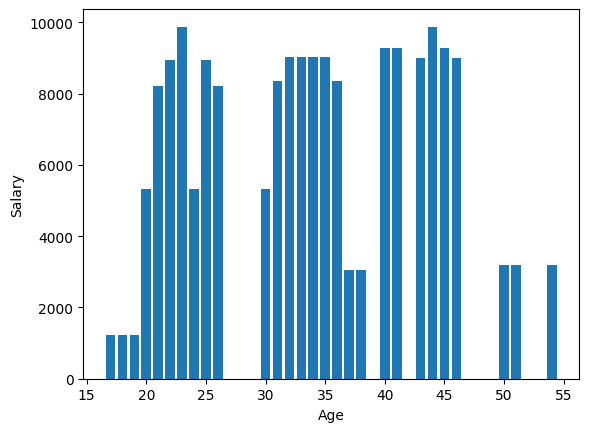

In [270]:
#chart with age and salary

plt.bar(employee['Age'],employee['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [271]:
c=employee['Place'].value_counts()
c

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

Text(0, 0.5, 'Number of people')

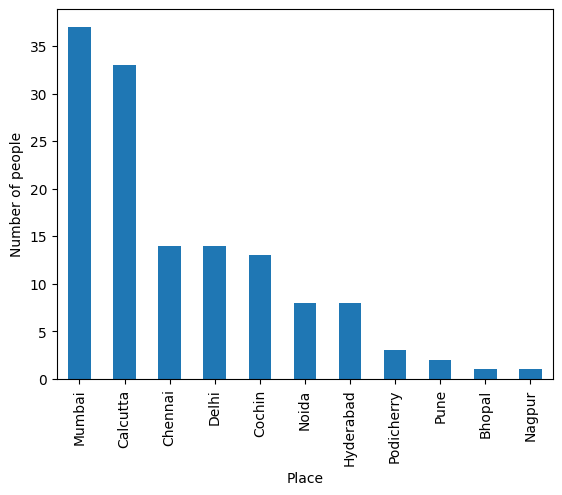

In [272]:
c.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Number of people')

#### Data Encoding:
#### Convert categorical variables into numerical representations using techniques such as
#### one-hot encoding, label encoding, making them suitable for analysis by machinelearning algorithms

In [273]:
employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20,5312,Chennai,India,M
1,Infosys,30,5312,Mumbai,India,M
2,TCS,35,2300,Calcutta,India,M
3,Infosys,40,3000,Delhi,India,M
4,TCS,23,4000,Mumbai,India,M
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,F
144,Infosys,22,8787,Calcutta,India,F
145,Infosys,44,4034,Delhi,India,F
146,TCS,33,5034,Mumbai,India,F


In [274]:
employee['Gender'].replace('M',0,inplace=True)
employee['Gender'].replace('F',1,inplace=True)

employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20,5312,Chennai,India,0
1,Infosys,30,5312,Mumbai,India,0
2,TCS,35,2300,Calcutta,India,0
3,Infosys,40,3000,Delhi,India,0
4,TCS,23,4000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,1
144,Infosys,22,8787,Calcutta,India,1
145,Infosys,44,4034,Delhi,India,1
146,TCS,33,5034,Mumbai,India,1


In [275]:
import numpy as np
df_one_hot_encoded = pd.get_dummies(data = employee, columns = ["Company", "Place",'Country'])

print(df_one_hot_encoded)

     Age  Salary  Gender  Company_CTS  Company_Congnizant  Company_Infosys  \
0     20    5312       0        False               False            False   
1     30    5312       0        False               False             True   
2     35    2300       0        False               False            False   
3     40    3000       0        False               False             True   
4     23    4000       0        False               False            False   
..   ...     ...     ...          ...                 ...              ...   
143   33    9024       1        False               False            False   
144   22    8787       1        False               False             True   
145   44    4034       1        False               False             True   
146   33    5034       1        False               False            False   
147   22    8202       0        False               False             True   

     Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consult

In [276]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ["Company", "Place",'Country']
new_encoded_cols_names = []

for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in employee[col].unique().tolist()]

print(new_encoded_cols_names)


one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoded_cols = one_hot_encoder.fit_transform(employee[cols_to_encode])


df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df_one_hot_encoded = employee.join(df_encoded)

print(df_one_hot_encoded)

['is_TCS', 'is_Infosys', 'is_CTS', 'is_nan', 'is_Tata Consultancy Services', 'is_Congnizant', 'is_Infosys Pvt Lmt', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_nan', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']
     Company  Age  Salary     Place Country  Gender  is_TCS  is_Infosys  \
0        TCS   20    5312   Chennai   India       0     0.0         0.0   
1    Infosys   30    5312    Mumbai   India       0     0.0         0.0   
2        TCS   35    2300  Calcutta   India       0     0.0         0.0   
3    Infosys   40    3000     Delhi   India       0     0.0         0.0   
4        TCS   23    4000    Mumbai   India       0     0.0         0.0   
..       ...  ...     ...       ...     ...     ...     ...         ...   
143      TCS   33    9024  Calcutta   India       1     0.0         0.0   
144  Infosys   22    8787  Calcutta   India       1     0.0         0.0   
145  Infosys   44    4034     Delhi   

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [277]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in employee:
    employee[i] = label_encoder.fit_transform(employee[i])

In [278]:
employee.Company.value_counts()

Company
4    53
2    45
0    36
6     8
5     2
1     2
3     2
Name: count, dtype: int64

In [279]:
employee

,Company,Age,Salary,Place,Country,Gender
0,4,3,21,2,0,0
1,2,10,21,6,0,0
2,4,15,3,1,0,0
3,2,19,5,4,0,0
4,4,6,12,6,0,0
...,...,...,...,...,...,...
143,4,13,38,1,0,1
144,2,5,35,1,0,1
145,2,22,13,4,0,1
146,4,13,19,6,0,1


#### Feature Scaling:
#### After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler

In [280]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(employee)

scaled_data = scaler.transform(employee)

print(scaled_data)

[[ 0.84843616 -1.49675369  0.12933898 -0.85254229  0.         -0.53568323]
 [-0.27271162 -0.38757141  0.12933898  0.42843496  0.         -0.53568323]
 [ 0.84843616  0.40470164 -1.38854223 -1.1727866   0.         -0.53568323]
 [-0.27271162  1.03852009 -1.21988876 -0.21205367  0.         -0.53568323]
 [ 0.84843616 -1.02138986 -0.62960163  0.42843496  0.         -0.53568323]
 [-0.27271162 -0.07066219 -0.20796796 -1.1727866   0.         -0.53568323]
 [ 0.84843616 -0.07066219  0.55097264 -0.85254229  0.          1.86677489]
 [-0.27271162 -1.02138986  0.80395284  0.42843496  0.          1.86677489]
 [ 0.84843616  0.24624703  1.05693305 -1.1727866   0.          1.86677489]
 [-1.3938594   1.67233853  1.47856671 -0.21205367  0.         -0.53568323]
 [-1.3938594  -1.02138986  0.12933898  0.42843496  0.         -0.53568323]
 [-1.3938594   0.24624703 -1.64152243 -1.1727866   0.         -0.53568323]
 [-1.3938594   1.67233853  0.12933898 -0.85254229  0.         -0.53568323]
 [-1.3938594  -1.81366292

In [281]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(employee)

scaled_data = scaler.transform(employee)

print(scaled_data)

[[0.66666667 0.11111111 0.525      0.18181818 0.         0.        ]
 [0.33333333 0.37037037 0.525      0.54545455 0.         0.        ]
 [0.66666667 0.55555556 0.075      0.09090909 0.         0.        ]
 [0.33333333 0.7037037  0.125      0.36363636 0.         0.        ]
 [0.66666667 0.22222222 0.3        0.54545455 0.         0.        ]
 [0.33333333 0.44444444 0.425      0.09090909 0.         0.        ]
 [0.66666667 0.44444444 0.65       0.18181818 0.         1.        ]
 [0.33333333 0.22222222 0.725      0.54545455 0.         1.        ]
 [0.66666667 0.51851852 0.8        0.09090909 0.         1.        ]
 [0.         0.85185185 0.925      0.36363636 0.         0.        ]
 [0.         0.22222222 0.525      0.54545455 0.         0.        ]
 [0.         0.51851852 0.         0.09090909 0.         0.        ]
 [0.         0.85185185 0.525      0.18181818 0.         0.        ]
 [0.         0.03703704 0.025      0.54545455 0.         0.        ]
 [0.33333333 0.7037037  0.125     